In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [195]:
# create some fake data for user 1
base = (list(np.arange(-5,5, 0.35)) + list(np.arange(-4, 4, 0.35))[::-1]) * 7
ax_u1 = [ el + np.random.randint(-2, 3) for el in base ] 
ay_u1 = [ el + np.random.randint(-2, 3) for el in base ] 
az_u1 = [ el + np.random.randint(-2, 3) for el in base ]
time_scale = 20
time_millis = [ el * time_scale for el in list(range(0, len(ax))) ]

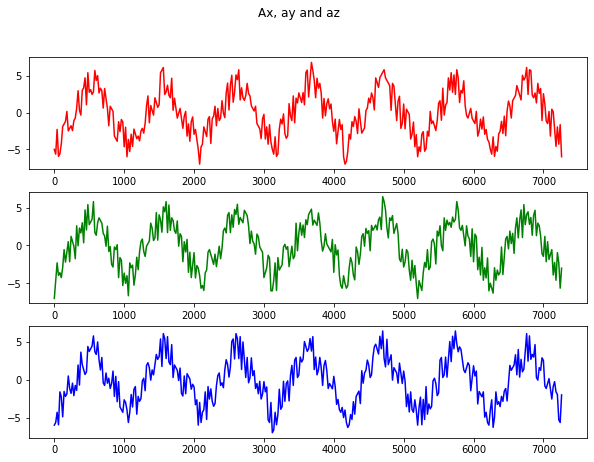

In [196]:
def plot_data(ax, ay, az):
    fig, axs = plt.subplots(3, figsize=(10,7))
    fig.suptitle('Ax, ay and az')
    axs[0].plot(time_millis, ax, color="red")
    axs[1].plot(time_millis, ay, color="green")
    axs[2].plot(time_millis, az, color="blue")
    plt.show()

plot_data(ax_u1, ay_u1, az_u1)

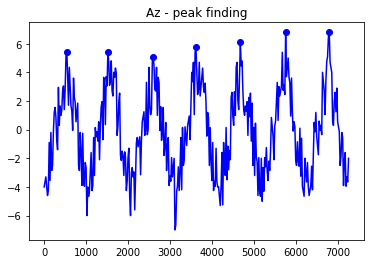

peaks indices = [ 27  76 130 181 234 288 340]
peaks values = [5.45, 5.4, 5.1, 5.75, 6.1, 6.8, 6.8]


In [198]:
# step 1 - peak finding on the z-axis

from scipy.signal import find_peaks

az_mean = np.mean(az)
peaks,_ = find_peaks(az, distance= 600/time_scale, height = az_mean + 2)
plt.plot(time_millis, az, color="blue", markevery=peaks, marker="o", label="points")
plt.title("Az - peak finding")
plt.show()
print(f"peaks indices = {peaks}")
print(f"peaks values = { [ round(az[peak],2) for peak in peaks ]}")

window time = 800ms


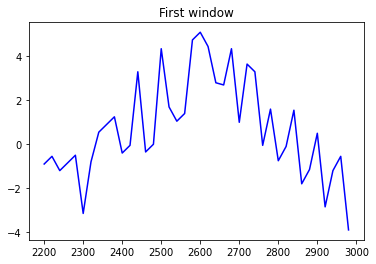

In [183]:
# step 2 - create sliding windows centred around the peak

# total no. of readings to take

def generate_windows(az, time_scale, num_readings=40,):
    print(f"window time = {num_readings * time_scale}ms")
    # windows store the az readings for various windows
    windows = []
    window_times = []
    for peak in peaks:
        window, window_time = [], []
        
        # include half of the readings on either side of the peak
        lower = int(peak - num_readings/2)
        upper = int(peak + num_readings/2)
        
        for x in range(lower, upper):
            window.append(az[x])
            window_time.append(time_millis[x])
        windows.append(window)
        window_times.append(window_time)
        
    return windows, window_times

windows, window_times = generate_windows(az, time_scale, num_readings=40)
plt.plot(window_times[2], windows[2], color="blue")
plt.title("First window")
plt.show()